In [ ]:
!pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving employee_attrition_dataset.csv to employee_attrition_dataset.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
data = pd.read_csv('/content/employee_attrition_dataset.csv')

# View the first few rows
data.head()


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,...,No,3,33,0,4,1,3,44,3,No


In [ ]:
data.shape

(1000, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [ ]:
data.duplicated().value_counts()

,count
False,1000


In [ ]:
duplicate_ids = data[data['Employee_ID'].duplicated()] # 0 False , 1 False
duplicate_ids.shape[0]#display duplicated rows , shape[0] returns number of duplicate rows

0

In [ ]:
data.isnull().sum() #sum of null columns

,0
Employee_ID,0
Age,0
Gender,0
Marital_Status,0
Department,0
Job_Role,0
Job_Level,0
Monthly_Income,0
Hourly_Rate,0
Years_at_Company,0


In [ ]:
data.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [ ]:
data.drop(columns=["Employee_ID"], inplace=True)#??

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

# Normalize numerical features

In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'Attrition' in numerical_cols:
    numerical_cols.remove('Attrition')  # only remove if it's actually in the list

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


# create new interaction features

In [ ]:
data['Salary_Performance_Ratio'] = data['Monthly_Income'] / (data['Performance_Rating'] + 1)

data['Salary_Performance_Ratio'] = scaler.fit_transform(data[['Salary_Performance_Ratio']])



In [ ]:
# Convert categorical Tenure_Group to numeric
data['Tenure_Group'] = pd.cut(data['Years_at_Company'] * 29, bins=[0, 5, 10, 20, 30], labels=[0, 1, 2, 3])  # 29 is max
data['Tenure_Group'] = data['Tenure_Group'].cat.add_categories([-1]).fillna(-1).astype(int)

In [ ]:
data.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition,Salary_Performance_Ratio,Tenure_Group
0,0.000000,0.974359,Female,Married,IT,Manager,0.0,0.734616,0.154762,0.500000,...,0.827586,0.894737,1.000000,1.000000,1.000000,0.395833,0.666667,No,0.367308,2
1,0.001001,0.717949,Female,Married,Sales,Assistant,1.0,0.592893,0.154762,0.178571,...,0.517241,0.052632,1.000000,0.000000,0.333333,0.500000,0.333333,No,0.592893,1
2,0.002002,0.358974,Male,Married,Marketing,Assistant,0.0,0.632016,0.107143,0.821429,...,0.137931,0.105263,0.666667,1.000000,1.000000,0.916667,0.666667,No,0.632016,3
3,0.003003,0.179487,Female,Divorced,Marketing,Manager,0.0,0.224026,0.130952,0.321429,...,0.620690,0.947368,0.333333,0.666667,0.000000,0.708333,0.666667,No,0.112013,1
4,0.004004,0.512821,Male,Divorced,Marketing,Executive,0.0,0.423873,0.440476,1.000000,...,0.103448,0.000000,1.000000,0.000000,0.666667,0.895833,0.666667,No,0.423873,3


In [ ]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

Attrition distribution

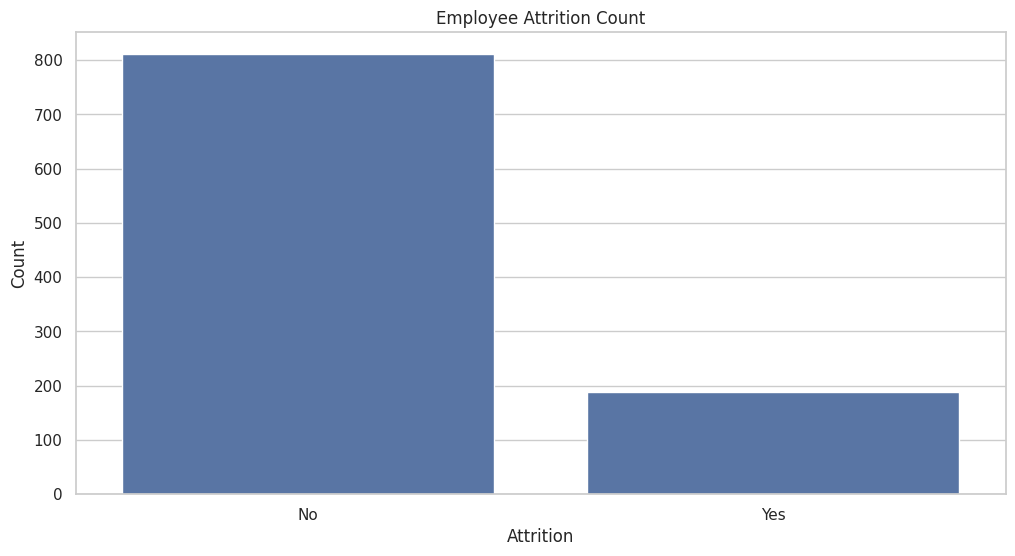

In [ ]:
plt.figure()
sns.countplot(data=data, x='Attrition')
plt.title("Employee Attrition Count")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

Attrition by Job Role

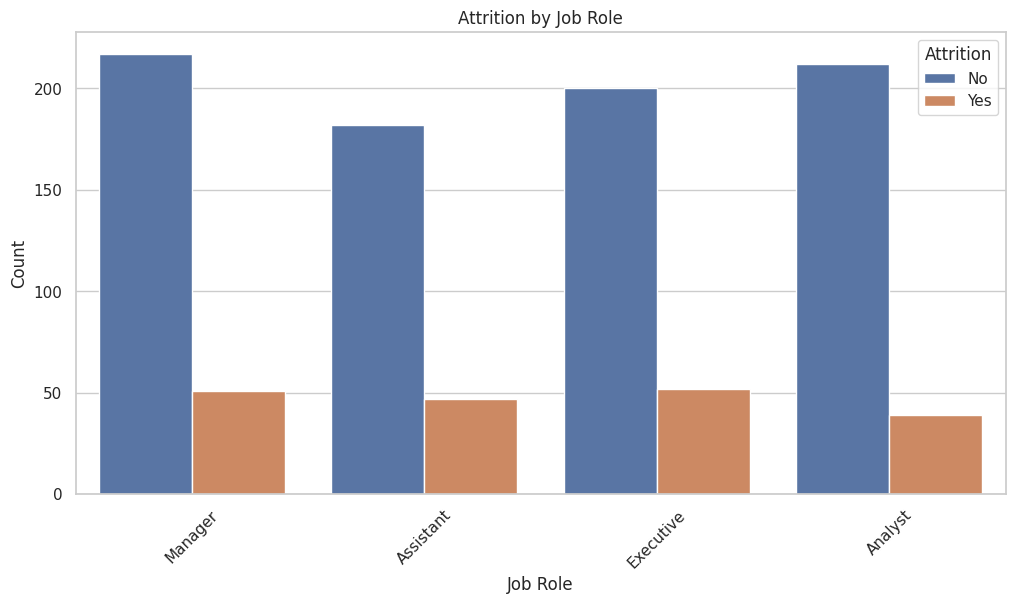

In [ ]:
plt.figure()
sns.countplot(data=data, x='Job_Role', hue='Attrition')
plt.title("Attrition by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.show()

Monthly Income distribution by Attrition

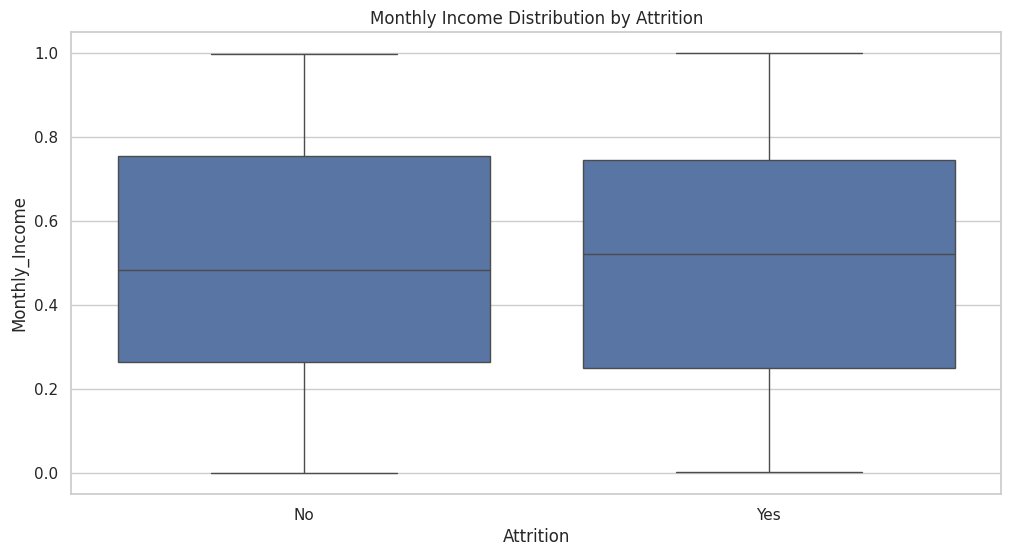

In [ ]:
plt.figure()
sns.boxplot(data=data, x='Attrition', y='Monthly_Income')
plt.title("Monthly Income Distribution by Attrition")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Correlation heatmap

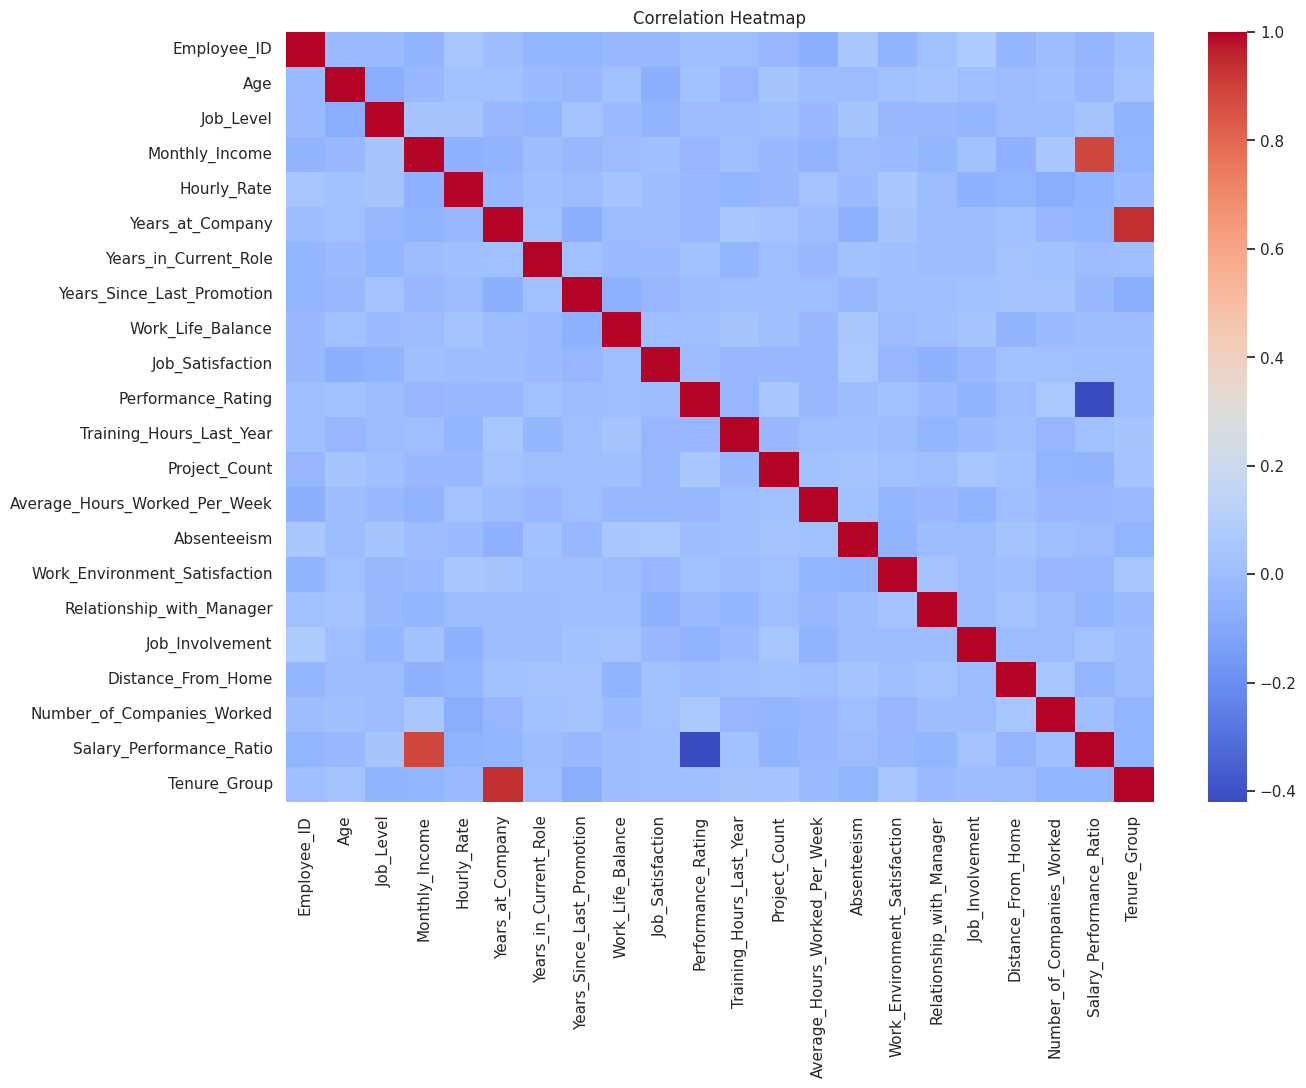

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


Attrition by Tenure Group

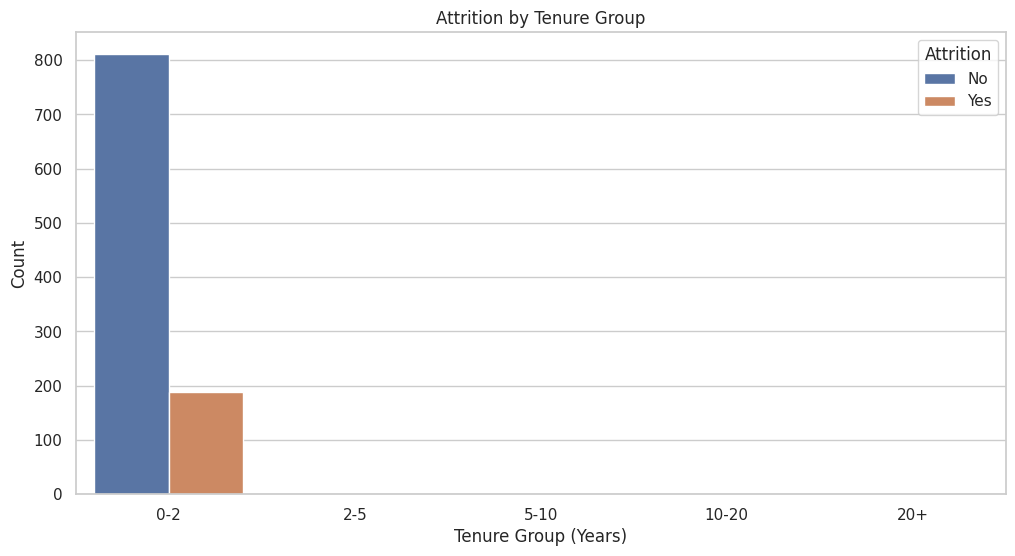

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create Tenure_Group based on 'Years_at_Company'
bins = [0, 2, 5, 10, 20, 40]
labels = ['0-2', '2-5', '5-10', '10-20', '20+']
data['Tenure_Group'] = pd.cut(data['Years_at_Company'], bins=bins, labels=labels, right=False)

# Plotting
plt.figure()
sns.countplot(data=data, x='Tenure_Group', hue='Attrition')
plt.title("Attrition by Tenure Group")
plt.xlabel("Tenure Group (Years)")
plt.ylabel("Count")
plt.show()


In [ ]:
import plotly.express as px

fig = px.box(
    data_frame=data,
    x='Attrition',
    y='Monthly_Income',
    color='Attrition',
    title='Monthly Income vs Attrition (Interactive)'
)
fig.show()


In [ ]:
# Create a tenure group feature based on years at company
def categorize_tenure(years):
    if years < 3:
        return 'Short-Term'
    elif 3 <= years <= 6:
        return 'Medium-Term'
    else:
        return 'Long-Term'

# Apply the function to create the new column
data['Tenure_Group'] = data['Years_at_Company'].apply(categorize_tenure)

# Optional: Check the value counts
print(data['Tenure_Group'].value_counts())


Tenure_Group
Short-Term    1000
Name: count, dtype: int64


In [ ]:
import plotly.express as px

fig = px.bar(
    data_frame=data,
    x='Tenure_Group',
    color='Attrition',
    title='Attrition Rate by Tenure Group',
    barmode='group'
)
fig.show()


In [ ]:
from scipy.stats import ttest_ind

# Perform the t-test
ttest_result = ttest_ind(data[data['Attrition'] == 'Yes']['Monthly_Income'],
                         data[data['Attrition'] == 'No']['Monthly_Income'])
print(ttest_result)


TtestResult(statistic=np.float64(0.376634678550193), pvalue=np.float64(0.706525172743868), df=np.float64(998.0))


In [ ]:
# Chi-squared test for categorical variable: Job_Role
contingency = pd.crosstab(data['Job_Role'], data['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared test: chi2={chi2:.4f}, p-value={p:.4f}")


Chi-squared test: chi2=2.7429, p-value=0.4330


In [ ]:
# ANOVA test across different Job Roles
groups = [group['Performance_Rating'].dropna().values for _, group in data.groupby('Job_Role')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA: F-statistic={f_stat:.4f}, p-value={p_val:.4f}")


ANOVA: F-statistic=2.3843, p-value=0.0678


In [ ]:
def categorize_tenure(years):
    if years < 3:
        return 'Short-term'
    elif years <= 7:
        return 'Medium-term'
    else:
        return 'Long-term'

data['TenureCategory'] = data['Years_at_Company'].apply(categorize_tenure)


In [ ]:
data['SalaryBand'] = pd.qcut(data['Monthly_Income'], q=3, labels=['Low', 'Medium', 'High'])


In [ ]:
scaler = StandardScaler()
data[['Monthly_Income', 'Years_at_Company']] = scaler.fit_transform(data[['Monthly_Income', 'Years_at_Company']])


In [ ]:
df = pd.get_dummies(data, columns=['Job_Role', 'Department', 'TenureCategory', 'SalaryBand'], drop_first=True)


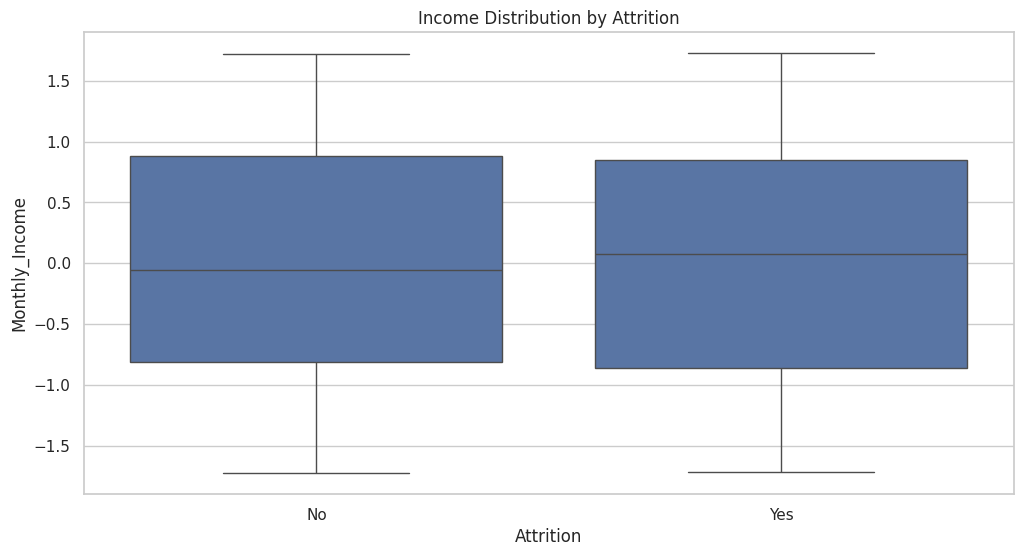

In [ ]:
sns.boxplot(x='Attrition', y='Monthly_Income', data=df)
plt.title('Income Distribution by Attrition')
plt.show()


In [ ]:
fig = px.box(df, x='Attrition', y='Monthly_Income', color='Attrition',
             title='Interactive Income Distribution by Attrition')
fig.show()


In [ ]:
# Check if 'Employee_ID' exists in the DataFrame columns
if 'Employee_ID' in df.columns:
    X_numeric = df.select_dtypes(include=[np.number]).drop(columns=['Employee_ID'])  # Drop ID column if present
else:
    X_numeric = df.select_dtypes(include=[np.number])  # Only select numeric columns if no 'Employee_ID'

# Ensure 'Attrition' is binary and encode it correctly
y = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Now proceed with the model fitting steps...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Select relevant features (replace 'Salary' with 'Monthly_Income')
X = data[['Monthly_Income', 'Age', 'Years_at_Company']]
y = data['Attrition']

# Encode target variable (Attrition: Yes/No → 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.84


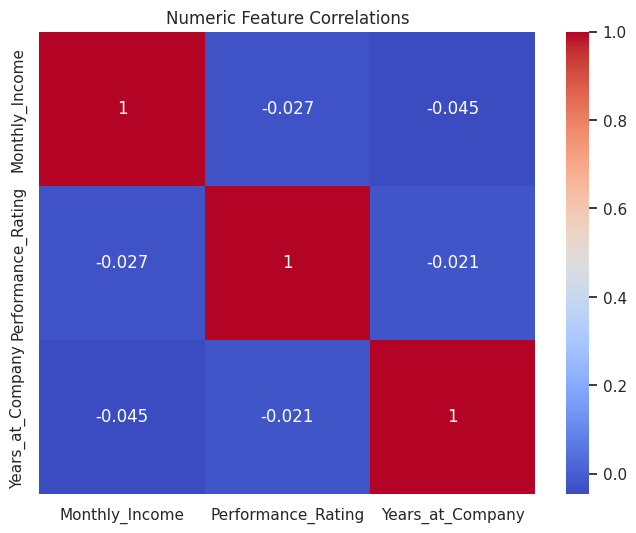

In [ ]:
# Heatmap of correlations (numeric only)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Monthly_Income', 'Performance_Rating', 'Years_at_Company']].corr(),
            cmap='coolwarm', annot=True)
plt.title("Numeric Feature Correlations")
plt.show()


In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px


In [ ]:
# Save this as app.py and run with: python app.py

import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load your data
data = pd.read_csv("employee_attrition_dataset.csv")  # Replace with the correct path to your CSV

# Corrected column name for salary (use Monthly_Income or whatever exists in your data)
salary_col = 'Monthly_Income'  # Ensure this exists in your data

# Initialize the Dash app
app = dash.Dash(__name__)
server = app.server  # for deployment if needed

# Bar chart: Attrition by Job Role
fig1 = px.histogram(
    data, x='Job_Role', color='Attrition', barmode='group',
    title="Attrition by Job Role"
)

# Box plot: Salary by Attrition
fig2 = px.box(
    data, x='Attrition', y=salary_col,
    title="Salary by Attrition", points="all"
)

# Layout
app.layout = html.Div([
    html.H1("Employee Attrition Dashboard"),

    dcc.Dropdown(
        id='role-filter',
        options=[{'label': role, 'value': role} for role in sorted(data['Job_Role'].unique())],
        placeholder="Filter by Job Role",
        style={'width': '50%', 'margin-bottom': '20px'}
    ),

    dcc.Graph(id='bar-role', figure=fig1),
    dcc.Graph(id='box-salary', figure=fig2)
])

# Callback to update bar chart based on dropdown
@app.callback(
    Output('bar-role', 'figure'),
    Input('role-filter', 'value')
)
def update_bar(selected_role):
    if selected_role is None:
        # All job roles shown
        fig = px.histogram(
            data, x='Job_Role', color='Attrition',
            barmode='group', title="Attrition by Job Role"
        )
    else:
        # Only selected role shown
        filtered_data = data[data['Job_Role'] == selected_role]
        fig = px.histogram(
            filtered_data, x='Attrition', color='Attrition',
            title=f"Attrition Count for {selected_role}"
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Attrition'])  # Adjust if the target column is named differently
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
data = pd.get_dummies(data, columns=['Attrition'], drop_first=True)

X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming `data` is already loaded and includes 'Attrition_Yes'

# 1. One-hot encode other categorical columns (won't affect 'Attrition_Yes')
data = pd.get_dummies(data, drop_first=True)

# 2. Separate features and target
X = data.drop('Attrition_Yes', axis=1)
y = data['Attrition_Yes']

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
print("Training Logistic Regression...")
model.fit(X_train, y_train)

# 5. Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Training Logistic Regression...

Classification Report:
              precision    recall  f1-score   support

       False       0.81      1.00      0.90       162
        True       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200

Accuracy: 0.81


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p

In [ ]:
# Convert boolean columns to integers (1 for True, 0 for False)
X = X.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Now, apply SMOTE for balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Proceed with model fitting...


In [ ]:
# 1. Re-load or reset the dataset if needed
# data = pd.read_csv("your_file.csv")

# 2. Convert 'Attrition' to binary if not done
if 'Attrition' in data.columns:
    data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

# 3. Identify categorical columns automatically
categorical_columns = data.select_dtypes(include='object').columns.tolist()

# 4. Encode categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# 5. Separate features and target
target_column = 'Attrition_Yes' if 'Attrition_Yes' in data_encoded.columns else 'Attrition'
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
log_reg_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Put them in a list for easy iteration
models = [log_reg_model, rf_model, gb_model, xgb_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']

# Load data (Assuming data is already preprocessed and encoded)
# data = pd.read_csv("your_file.csv")

# Separate features (X) and target (y)
X = data.drop('Attrition_Yes', axis=1)  # or your target column
y = data['Attrition_Yes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate each model
for model_name, model in zip(model_names, models):
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))



Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-p


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.81      1.00      0.90       162
        True       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200

Accuracy: 0.81

Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.81      1.00      0.90       162
        True       0.00      0.00      0.00        38

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.72       200

Accuracy: 0.81

Training Gradient Boosting...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.98      0.89       162
        True       0.25      0.03      0.05        38

    accuracy                           0.80       200
   macro avg       0.53      0.50      0.47       200
weighted avg       0.70      0.80      0.73       200

Accuracy: 0.8

Training XGBoost...

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.96      0.88       162
        True       0.00      0.00      0.00        38

    accuracy                           0.78       200
   macro avg       0.40      0.48      0.44       200
weighted avg       0.65      0.78      0.71       200

Accuracy: 0.78


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

# 1. Standardize features to help Logistic Regression converge
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# 2. Train and tune models
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train_resampled)

# Random Forest with GridSearchCV
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train_resampled, y_train_resampled)
best_rf = rf_grid.best_estimator_

# XGBoost with GridSearchCV
xgb_param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [100],
    'max_depth': [3]
}
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False), xgb_param_grid, cv=3, n_jobs=-1)
xgb_grid.fit(X_train_resampled, y_train_resampled)
best_xgb = xgb_grid.best_estimator_

# 3. Store models in dictionary
models = {
    'Logistic Regression': log_reg,
    'Random Forest': best_rf,
    'XGBoost': best_xgb
}

# 4. Evaluate models and compare
results = []

for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'ROC-AUC': roc
    })

model_comparison = pd.DataFrame(results)

# 5. Show results
print(model_comparison)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression      0.64   0.145833  0.184211  0.162791  0.406595
1        Random Forest      0.75   0.166667  0.078947  0.107143  0.439571
2              XGBoost      0.64   0.145833  0.184211  0.162791  0.457440


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[14:30:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [ ]:
# Assume the best model is Random Forest after comparison
best_model = rf_grid.best_estimator_  # or use the best model you found

# Train the final model with the entire training data (resampled)
best_model.fit(X_train_resampled, y_train_resampled)

# Save the model for deployment
import joblib
joblib.dump(best_model, 'final_employee_attrition_model.pkl')


['final_employee_attrition_model.pkl']


=== Logistic Regression ===
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.75      0.77       162
        True       0.15      0.18      0.16        38

    accuracy                           0.64       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.67      0.64      0.66       200



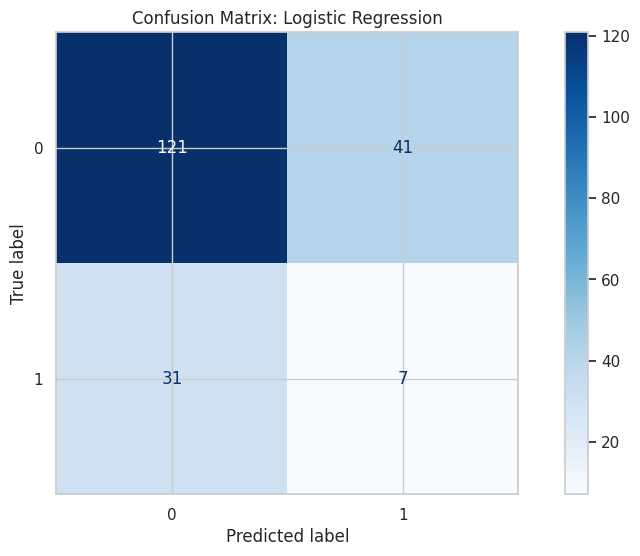


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.91      0.85       162
        True       0.17      0.08      0.11        38

    accuracy                           0.75       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.69      0.75      0.71       200



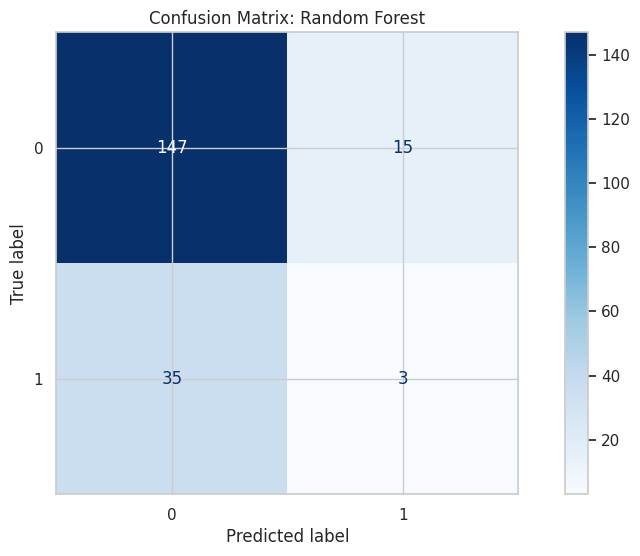


=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.75      0.77       162
        True       0.15      0.18      0.16        38

    accuracy                           0.64       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.67      0.64      0.66       200



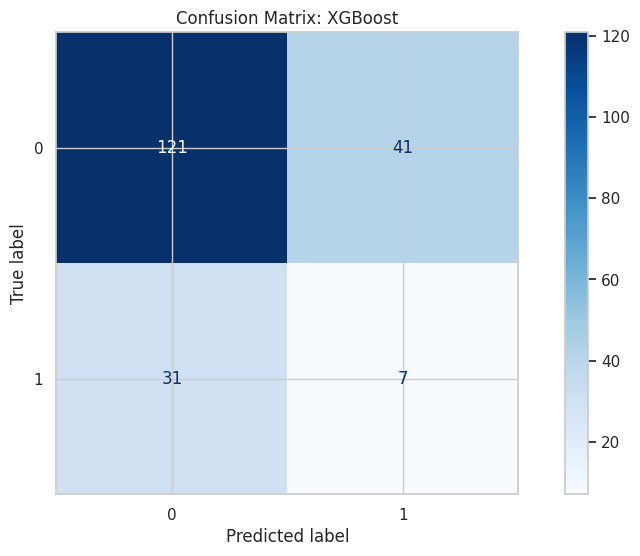

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for model_name, model in models.items():
    print(f"\n=== {model_name} ===")

    # Use scaled data only for logistic regression
    if model_name == "Logistic Regression":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Text report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()


In [ ]:
import joblib

# Load the model
model = joblib.load('final_employee_attrition_model.pkl')

# Use the model to make predictions
y_pred = model.predict(X_test)


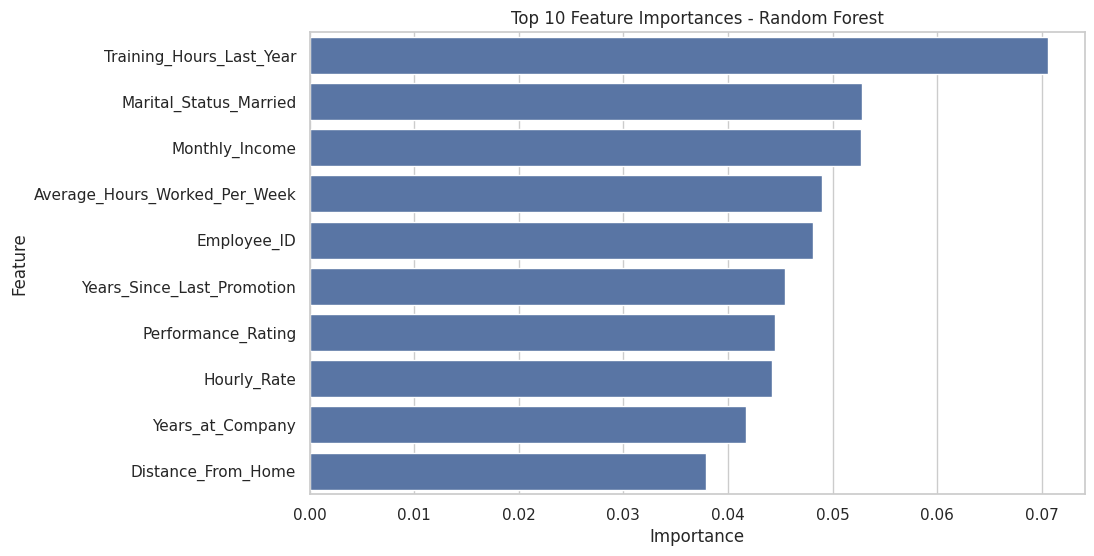

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example with Random Forest
importances = models['Random Forest'].feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values('Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_df, x='Importance', y='Feature')
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results.append((name, accuracy, roc))

pd.DataFrame(results, columns=["Model", "Accuracy", "ROC-AUC"]).sort_values("ROC-AUC", ascending=False)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



,Model,Accuracy,ROC-AUC
1,Random Forest,0.94,0.938998
2,XGBoost,0.74,0.673508
0,Logistic Regression,0.85,0.560087


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import mlflow
import mlflow.sklearn

# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)

# Save the model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# MLflow logging
with mlflow.start_run():
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_artifact("model.pkl")  # Logs the saved model file


In [ ]:
import mlflow

# Get the most recent run
latest_run = mlflow.search_runs(order_by=["start_time desc"]).iloc[0]

# Fetch parameters and metrics using mlflow
run_id = latest_run['run_id']
run = mlflow.get_run(run_id)

# Access the parameters and metrics from the run object
params = run.data.params
metrics = run.data.metrics

print("Parameters: ", params)
print("Metrics: ", metrics)


Parameters:  {'n_estimators': '100', 'random_state': '42'}
Metrics:  {'accuracy': 1.0}


In [ ]:
!pip install fastapi uvicorn joblib pydantic
!pip install pyngrok  # For exposing the app through ngrok


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Initialize FastAPI
app = FastAPI()

# Load the trained model
model = joblib.load("model.pkl")

# Define the input data model
class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int  # 1 for Yes, 0 for No

# Define the prediction endpoint
@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


In [ ]:
!ngrok authtoken 2wuZFqSR932D3og9iyUe4Ir0stU_4YaLp5GhnUVKXjzEfyR3B


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install fastapi uvicorn pyngrok


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Initialize FastAPI app
app = FastAPI()

# Load the trained model (ensure model.pkl is available)
model = joblib.load("model.pkl")  # Make sure this file exists in your environment

# Create a Pydantic model for the input data
class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int  # 1 for Yes, 0 for No

# Define the prediction endpoint
@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


In [ ]:
# Save the app code as a Python file (app.py)
with open("app.py", "w") as f:
    f.write("""
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()
model = joblib.load("model.pkl")

class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int  # 1 for Yes, 0 for No

@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}
""")


In [ ]:
from pyngrok import ngrok

# Create a public tunnel to the FastAPI app
public_url = ngrok.connect(8000)
print(f"🚀 Your FastAPI app is live at: {public_url}")


🚀 Your FastAPI app is live at: NgrokTunnel: "https://cdcc-34-73-74-194.ngrok-free.app" -> "http://localhost:8000"


In [ ]:
!uvicorn app:app --host 0.0.0.0 --port 8000 &


INFO:     Started server process [37621]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [37621]


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8000)
print(public_url)


NgrokTunnel: "https://64bf-34-73-74-194.ngrok-free.app" -> "http://localhost:8000"


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()
model = joblib.load("model.pkl")  # Make sure this file exists in the same directory

class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int

@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example training data
data = {
    "age": [25, 45, 30, 50],
    "job_level": [1, 3, 2, 4],
    "monthly_income": [3000, 8000, 5000, 10000],
    "years_at_company": [1, 10, 4, 15],
    "overtime": [1, 0, 1, 0],
    "attrition": [1, 0, 1, 0]  # Target variable
}

df = pd.DataFrame(data)

X = df.drop("attrition", axis=1)
y = df["attrition"]

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Save the model
joblib.dump(model, "model.pkl")  # ✅ Creates model.pkl file


['model.pkl']

In [ ]:
import os
print("model.pkl exists:", os.path.exists("model.pkl"))


model.pkl exists: True


In [ ]:
model = joblib.load("model.pkl")


In [ ]:
!pip install fastapi uvicorn nest-asyncio pyngrok joblib scikit-learn


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib

# Sample training data
data = {
    "age": [25, 45, 30, 50],
    "job_level": [1, 3, 2, 4],
    "monthly_income": [3000, 8000, 5000, 10000],
    "years_at_company": [1, 10, 4, 15],
    "overtime": [1, 0, 1, 0],
    "attrition": [1, 0, 1, 0]  # Target (0 = No, 1 = Yes)
}

df = pd.DataFrame(data)

X = df.drop("attrition", axis=1)
y = df["attrition"]

# Train the model
model = RandomForestClassifier()
model.fit(X, y)

# Save model to file
joblib.dump(model, "model.pkl")


['model.pkl']

In [ ]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

app = FastAPI()
model = joblib.load("model.pkl")

class EmployeeData(BaseModel):
    age: int
    job_level: int
    monthly_income: float
    years_at_company: int
    overtime: int  # 1 for Yes, 0 for No

@app.post("/predict")
def predict(data: EmployeeData):
    input_data = [[
        data.age, data.job_level, data.monthly_income,
        data.years_at_company, data.overtime
    ]]
    prediction = model.predict(input_data)
    return {"attrition_risk": int(prediction[0])}


Overwriting app.py


In [ ]:
!pip install python-multipart


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn

nest_asyncio.apply()

# Open ngrok tunnel
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Start server
uvicorn.run("app:app", host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://27ca-34-73-74-194.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [393]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [393]


In [ ]:
import uvicorn
import numpy as np
from fastapi import FastAPI, HTTPException, File, UploadFile
from pydantic import BaseModel
import pickle

# Load the pre-trained model
try:
    with open("model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
except FileNotFoundError:
    raise FileNotFoundError("Model file not found. Please ensure 'model.pkl' exists.")

# Create a FastAPI instance
app = FastAPI()

# Pydantic model for request validation
class PredictRequest(BaseModel):
    data: list

@app.get("/")
def read_root():
    return {"message": "Welcome to the model API!"}

@app.post("/predict")
async def predict(data: PredictRequest):
    try:
        # Ensure that the data is a proper array
        data_array = np.array(data.data).reshape(1, -1)
        prediction = model.predict(data_array)
        return {"prediction": prediction.tolist()}
    except Exception as e:
        raise HTTPException(status_code=400, detail=f"Prediction error: {str(e)}")

@app.post("/upload")
async def upload_file(file: UploadFile = File(...)):
    try:
        # You can handle file uploads here, for example:
        content = await file.read()
        # Process the file (e.g., if it’s an image or text) as needed
        return {"filename": file.filename, "content": content.decode("utf-8")[:100]}  # Just returning the first 100 chars
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Error processing file: {str(e)}")

if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)


INFO:     Started server process [393]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [393]
